# データ初期化作業
データの読み込みを行う。

# Content of data_original.csv

| Index | Param | Description |
|---|---|---|
| 0 | Case Index |  |
| 1 | Gender |  |
| 2 | Age |  |
| 3 | Height |  |
| 4 | Weight |  |
| 5 | MaxBP |  |
| 6 | MinBP |  |
| 7 | BTResult | 1.Normal 2.Needs Observation 3.Needs Advice 4.Doctor Consultation required |
| 8 | ECResult | 1.Normal 2.Needs Observation 3.Needs Advice 4.Doctor Consultation required |
| 9 | BMI | Weight/(Height)^2 |

# Content of data_generated.csv



[[1, 0, 53, 167, 75, 144, 80, 4, 4, 26.89232313815483],
 [2, 1, 55, 153, 64, 143, 110, 4, 3, 27.33991199965825],
 [3, 0, 43, 168, 68, 119, 90, 2, 2, 24.09297052154195],
 [4, 0, 28, 175, 72, 115, 82, 1, 1, 23.510204081632654],
 [5, 1, 29, 160, 48, 120, 80, 1, 1, 18.75]]
   gender  age  height  weight  MaxBP  MinBP  AverageBP  DeviationBP  \
0       0   53     167      75    144     80      112.0           64   
1       1   55     153      64    143    110      126.5           33   
2       0   43     168      68    119     90      104.5           29   
3       0   28     175      72    115     82       98.5           33   
4       1   29     160      48    120     80      100.0           40   

         BMI  BTOK1  ECOK1  BTOK2  ECOK2  
0  26.892323      1      1      1      1  
1  27.339912      1      1      1      1  
2  24.092971      1      1      0      0  
3  23.510204      0      0      0      0  
4  18.750000      0      0      0      0  


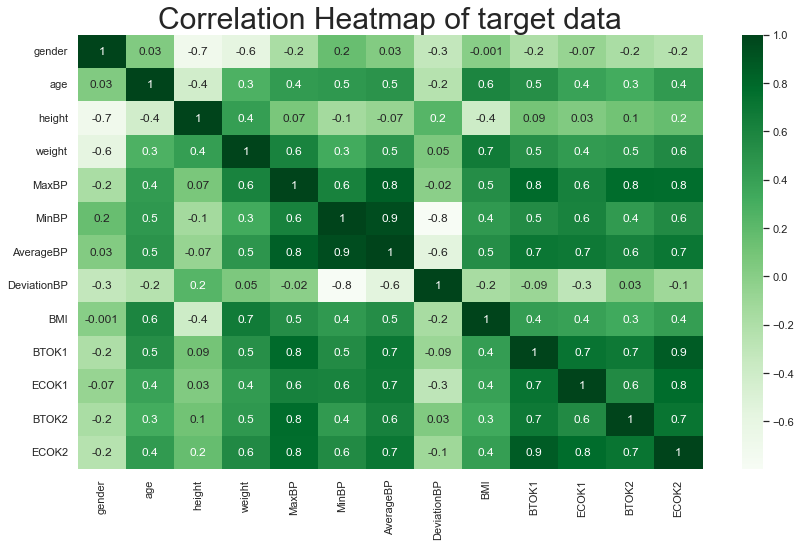

In [2]:
import numpy as np
import csv
import pprint

data = []
with open("data_original.csv", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        d = [int(row[0])]
        if row[1] == '男':
            d.append(0)
        else:
            d.append(1)
        for p in row[2:]:
            d.append(int(p))
        d.append(d[4] / pow(d[3], 2) * pow(10, 4))
        data.append(d)
pprint.pprint(data[:5])
npData = np.array(data)
import seaborn as sns

import pandas as pd

with open("data_generated.csv", "w") as f:
    f.write(
        "gender,age,height,weight,MaxBP,MinBP,AverageBP,DeviationBP,BMI,BTOK1,ECOK1,BTOK2,ECOK2\n")
    for d in data:
        f.write(str(d[1:7])[1:len(str(d[1:7])) - 1])
        f.write(",")
        f.write(str((d[5] + d[6]) / 2))
        f.write(",")
        f.write(str((d[5] - d[6])))
        f.write(",")
        f.write(str(d[9:])[1:len(str(d[9:])) - 1])
        f.write(",")
        f.write("0" if d[7] < 2 else "1")
        f.write(",")
        f.write("0" if d[8] < 2 else "1")
        f.write(",")
        f.write("0" if d[7] < 3 else "1")
        f.write(",")
        f.write("0" if d[8] < 3 else "1")
        f.write("\n")

with open("data_generated.csv", "r") as f:
    df = pd.read_csv(f)
    print(df.head())
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Greens", fmt='.1g')
heatmap.set(title="Correlation Heatmap of target data")
heatmap.title.set_size(30)

In [3]:
from statistics import mean, median, variance, stdev

tv = "MinBP"
print(tv + " average:" + str(mean(df[tv])))
print(tv + " median:" + str(median(df[tv])))
print(tv + " variance:" + str(variance(df[tv])))
print(tv + " stdev:" + str(stdev(df[tv])))
print(tv + " max:" + str(max(df[tv])))
print(tv + " min:" + str(min(df[tv])))

print(df[tv].std(ddof=1))

MinBP average:89.4
MinBP median:85.0
MinBP variance:231.26530612244898
MinBP stdev:15.2074095796243
MinBP max:129
MinBP min:65
15.207409579624303


# 方針

## 散布図とヒートマップの作成
- BPResultとBMIの関係
- MaxBP, MinBP, BTResultの関係→平均を求める?

[Text(0.5, 1.0, 'Relation Scatter Plot between ECResult and BMI')]

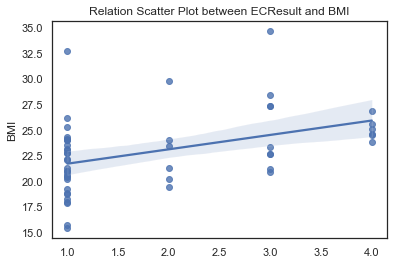

In [24]:

# use the function regplot to make a scatterplot
p = sns.regplot(x=npData[:, 8], y=df["BMI"])
p.set(title="Relation Scatter Plot between ECResult and BMI")

[112.  126.5 104.5  98.5 100.  117.5  97.5  95.  111.   99.  101.5 103.
 121.  109.  109.5 100.  103.5  99.5  91.5  85.  101.   99.   97.   96.5
 101.5 102.5 102.   99.  111.  104.5 102.  104.  105.  122.  116.  117.5
 116.  136.  115.  116.5 109.  102.5  95.   95.  105.  133.5 133.5 108.
 106.5 120.5]


[Text(0.5, 1.0, 'Relation Scatter Plot between BTResult and average of BP')]

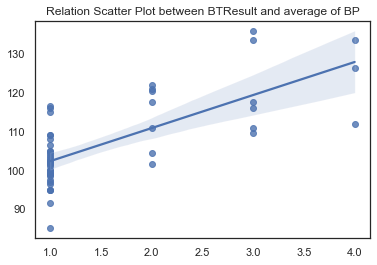

In [5]:
print((npData[:, 5] + npData[:, 6]) / 2)
p = sns.regplot(y=((npData[:, 5] + npData[:, 6]) / 2), x=(npData[:, 7]))
p.set(title="Relation Scatter Plot between BTResult and average of BP")

[Text(0.5, 1.0, 'Relation Scatter Plot between age and MinBP')]

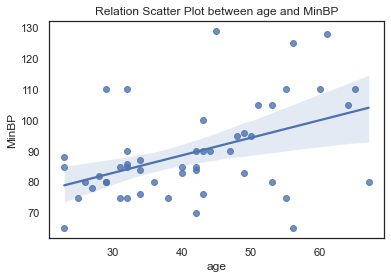

In [25]:
p = sns.regplot(x=df["age"], y=df["MinBP"])
p.set(title="Relation Scatter Plot between age and MinBP")

[ 0.4490932  88.60245081]
[-2.11835991e-03  6.32733392e-01  8.49338992e+01]


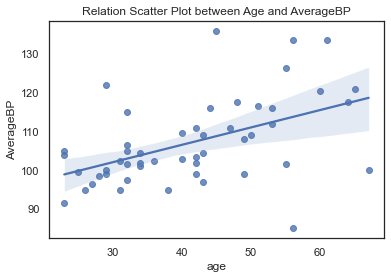

In [47]:
p = sns.regplot(x=df["age"], y=df["AverageBP"])
p.set(title="Relation Scatter Plot between Age and AverageBP")
coef = np.polyfit(df["age"], df["AverageBP"], 1)
print(coef)

[Text(0.5, 1.0, 'Relation Scatter Plot between Age and BMI')]

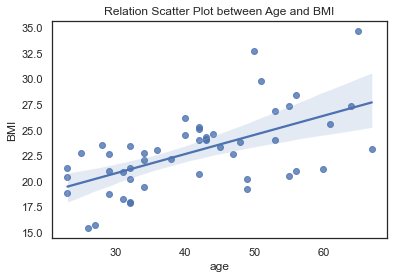

In [29]:
p = sns.regplot(x=df["age"], y=df["BMI"])
p.set(title="Relation Scatter Plot between Age and BMI")

[Text(0.5, 1.0, 'Relation Scatter Plot between Age and BT(1)')]

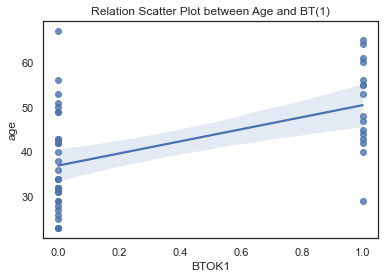

In [32]:
p = sns.regplot(y=df["age"], x=df["BTOK1"])
p.set(title="Relation Scatter Plot between Age and BT(1)")

[ 0.55636719 73.60105832]


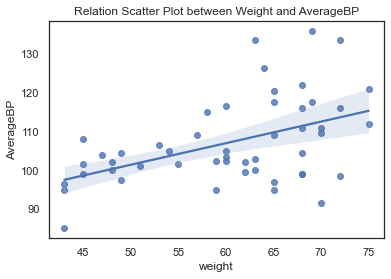

In [45]:
p = sns.regplot(x=df["weight"], y=df["AverageBP"])
p.set(title="Relation Scatter Plot between Weight and AverageBP")
coef = np.polyfit(df["weight"], df["AverageBP"], 1)
print(coef)
# from sklearn.linear_model import LinearRegression
#
# model_lr = LinearRegression()
# model_lr.fit(df["weight"], df["AverageBP"])
# plt.plot(df["weight"], df["AverageBP"], 'o')
# plt.plot(df["AverageBP"], model_lr.predict(df["AverageBP"]), linestyle="solid")
# plt.show()

# print('モデル関数の回帰変数 w1: %.3f' %model_lr.coef_)
# print('モデル関数の切片 w2: %.3f' %model_lr.intercept_)
# print('y= %.3fx + %.3f' % (model_lr.coef_ , model_lr.intercept_))
# print('決定係数 R^2： ', model_lr.score(x, y))

[Text(0.5, 1.0, 'Relation Scatter Plot between Weight and BT(1)')]

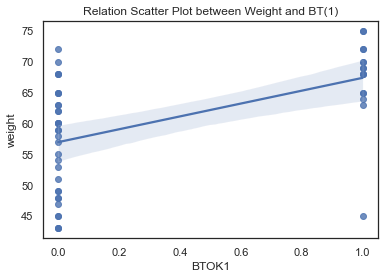

In [36]:
p = sns.regplot(y=df["weight"], x=df["BTOK1"])
p.set(title="Relation Scatter Plot between Weight and BT(1)")

[Text(0.5, 1.0, 'Relation Scatter Plot between Weight and BT(2)')]

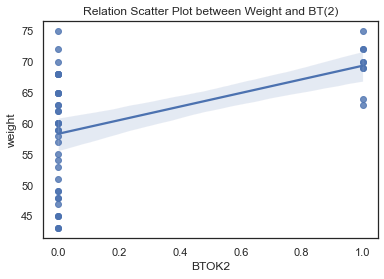

In [37]:
p = sns.regplot(y=df["weight"], x=df["BTOK2"])
p.set(title="Relation Scatter Plot between Weight and BT(2)")

[Text(0.5, 1.0, 'Relation Scatter Plot between AverageBP and BT(1)')]

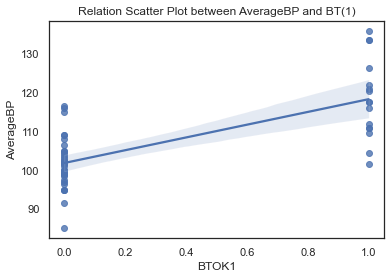

In [38]:
p = sns.regplot(y=df["AverageBP"], x=df["BTOK1"])
p.set(title="Relation Scatter Plot between AverageBP and BT(1)")

[Text(0.5, 1.0, 'Relation Scatter Plot between MinBP and BTResult')]

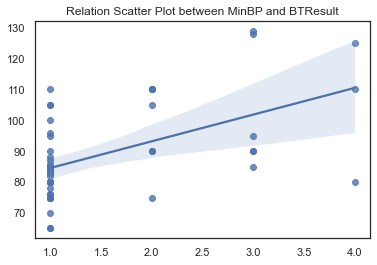

In [8]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 6])
p.set(title="Relation Scatter Plot between MinBP and BTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between MaxBP and ECResult')]

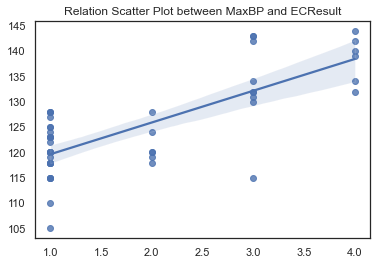

In [9]:
p = sns.regplot(x=npData[:, 8], y=npData[:, 5])
p.set(title="Relation Scatter Plot between MaxBP and ECResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between MinBP and ECResult')]

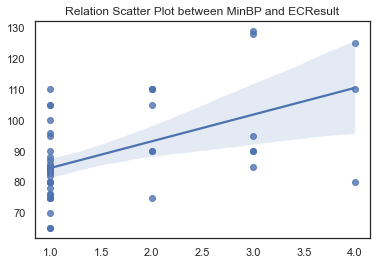

In [10]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 6])
p.set(title="Relation Scatter Plot between MinBP and ECResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between Age and ECResult')]

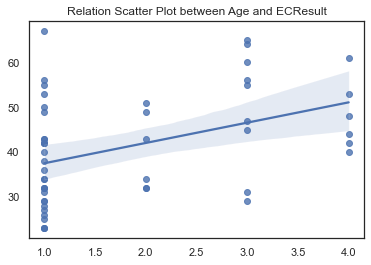

In [11]:
p = sns.regplot(x=npData[:, 8], y=npData[:, 2])
p.set(title="Relation Scatter Plot between Age and ECResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between Age and BTResult')]

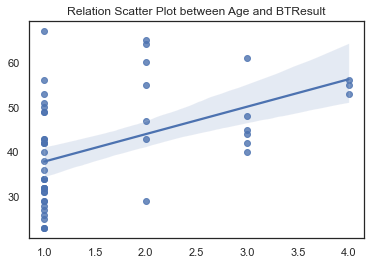

In [12]:
p = sns.regplot(x=npData[:, 7], y=npData[:, 2])
p.set(title="Relation Scatter Plot between Age and BTResult")

[Text(0.5, 1.0, 'Relation Scatter Plot between gender and height')]

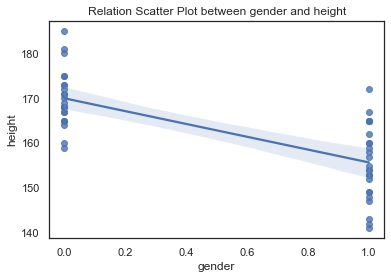

In [13]:
p = sns.regplot(x=df["gender"], y=df["height"])
p.set(title="Relation Scatter Plot between gender and height")

[Text(0.5, 1.0, 'Relation Scatter Plot between gender and weight')]

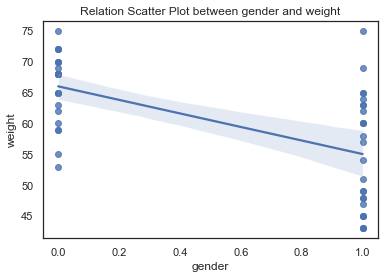

In [14]:
p = sns.regplot(x=df["gender"], y=df["weight"])
p.set(title="Relation Scatter Plot between gender and weight")

In [15]:
with open("data_only_diagnosis.csv", "w") as f:
    f.write(
        "BTOK1,ECOK1,BTOK2,ECOK2,BTOK3,ECOK3\n")
    for d in data:
        f.write("0" if d[7] < 2 else "1")
        f.write(",")
        f.write("0" if d[8] < 2 else "1")
        f.write(",")
        f.write("0" if d[7] < 3 else "1")
        f.write(",")
        f.write("0" if d[8] < 3 else "1")
        f.write(",")
        f.write("0" if d[7] < 4 else "1")
        f.write(",")
        f.write("0" if d[8] < 4 else "1")
        f.write("\n")

# 相関係数のヒートマップからの分析結果
- 血圧判定結果と心電図判定結果に強い正の相関が確認された。
- 平均血圧と心電図判定結果に強い正の相関が確認された。
- 性別と身長に強い相関が確認された。
- 最大血圧と血圧判定結果に強い正の相関が確認された。
- 最大血圧と心電図判定結果に強い正の相関が確認された。
-
- 年齢とBMIに正の相関があることが確認された。
-

# BMIが正規分布に従うのかを検定したい
## まず度数分布を作成してみる

(array([2., 2., 5., 6., 7., 9., 8., 4., 3., 1., 1., 0., 1., 1.]),
 array([15.41826527, 16.79608637, 18.17390746, 19.55172856, 20.92954966,
        22.30737076, 23.68519186, 25.06301296, 26.44083406, 27.81865516,
        29.19647626, 30.57429736, 31.95211846, 33.32993956, 34.70776066]),
 <BarContainer object of 14 artists>)

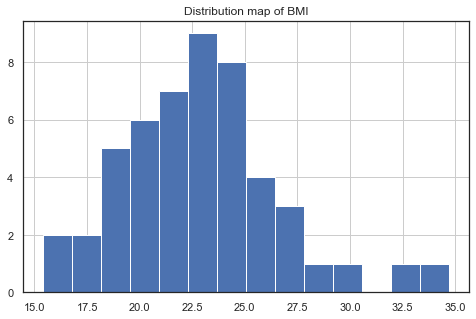

In [16]:
fig = plt.figure(figsize=(8, 5))
g = fig.add_subplot(1, 1, 1)
g.title.set_text("Distribution map of BMI")
g.grid(True)
g.hist(npData[:, 9], bins=14)

(array([ 1.,  1.,  3.,  8., 10.,  7.,  4.,  3.,  6.,  2.,  1.,  1.,  0.,
         3.]),
 array([ 85.        ,  88.64285714,  92.28571429,  95.92857143,
         99.57142857, 103.21428571, 106.85714286, 110.5       ,
        114.14285714, 117.78571429, 121.42857143, 125.07142857,
        128.71428571, 132.35714286, 136.        ]),
 <BarContainer object of 14 artists>)

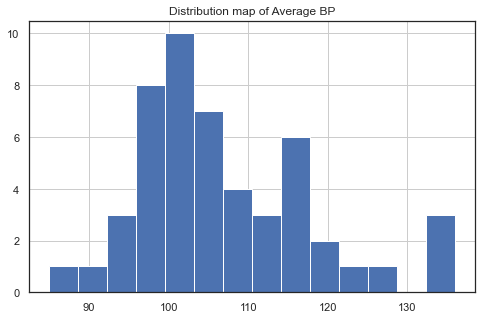

In [17]:
fig = plt.figure(figsize=(8, 5))
g = fig.add_subplot(1, 1, 1)
g.grid(True)
g.title.set_text("Distribution map of Average BP")
g.hist((npData[:, 5] + npData[:, 6]) / 2, bins=14)

(array([1., 1., 0., 5., 6., 9., 7., 3., 5., 4., 2., 0., 2., 5.]),
 array([105.        , 107.78571429, 110.57142857, 113.35714286,
        116.14285714, 118.92857143, 121.71428571, 124.5       ,
        127.28571429, 130.07142857, 132.85714286, 135.64285714,
        138.42857143, 141.21428571, 144.        ]),
 <BarContainer object of 14 artists>)

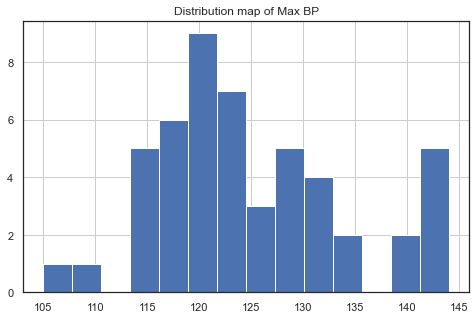

In [18]:
fig = plt.figure(figsize=(8, 5))
g = fig.add_subplot(1, 1, 1)
g.grid(True)
g.title.set_text("Distribution map of Max BP")
g.hist(npData[:, 5], bins=14)

(array([2., 1., 8., 9., 9., 6., 3., 1., 3., 5., 0., 0., 0., 3.]),
 array([ 65.        ,  69.57142857,  74.14285714,  78.71428571,
         83.28571429,  87.85714286,  92.42857143,  97.        ,
        101.57142857, 106.14285714, 110.71428571, 115.28571429,
        119.85714286, 124.42857143, 129.        ]),
 <BarContainer object of 14 artists>)

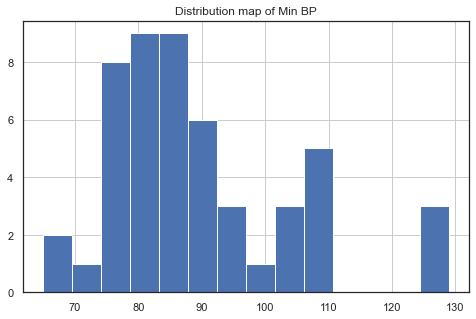

In [19]:
fig = plt.figure(figsize=(8, 5))
g = fig.add_subplot(1, 1, 1)
g.grid(True)
g.title.set_text("Distribution map of Min BP")
g.hist(npData[:, 6], bins=14)

BMI、平均血圧の値が正規分布に従うかについて検定を行う
シャピロウィンク検定で判断を行った。
BMIでのp値は0.087909となり、0.05よりも大きいため、
95%信頼区間において、帰無仮説「BMIデータ分布が正規分布に従う」は棄却されなかった。
一方、平均血圧でのp値は0.010125となり、0.05を下回ったため、95%信頼区間において
帰無仮説「平均血圧データ分布が正規分布に従う」という帰無仮説は棄却され、対立仮説「平均血圧データは正規分布に従わない」が採択された。

In [20]:
import scipy.stats as stats

print(stats.shapiro(npData[:, 9]))
print(stats.shapiro((npData[:, 5] + npData[:, 6]) / 2))

ShapiroResult(statistic=0.959884762763977, pvalue=0.08790994435548782)
ShapiroResult(statistic=0.936842679977417, pvalue=0.010125065222382545)


(array([0.68, 0.14, 0.12, 0.06]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

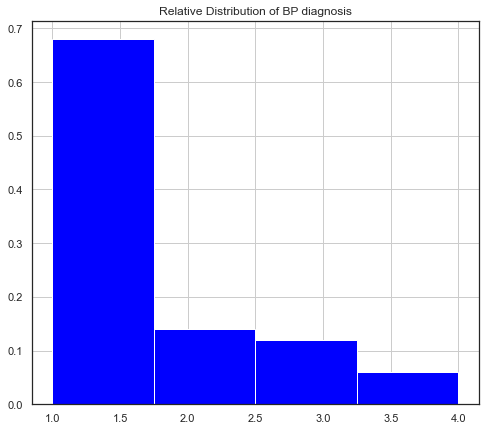

In [21]:
fig = plt.figure(figsize=(8, 24))
g = fig.add_subplot(311)
g.title.set_text("Relative Distribution of BP diagnosis")
g.grid(True)
weights = np.ones_like(npData[:, 7]) / len(npData[:, 7])
g.hist(npData[:, 7], bins=4, color="blue", weights=weights)

(array([0.58, 0.12, 0.18, 0.12]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

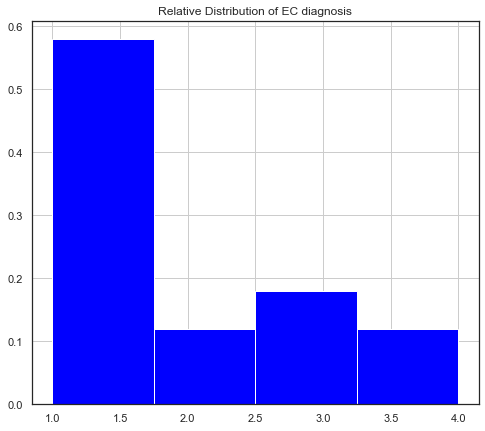

In [22]:
fig = plt.figure(figsize=(8, 24))
g = fig.add_subplot(311)
g.title.set_text("Relative Distribution of EC diagnosis")
g.grid(True)
weights = np.ones_like(npData[:, 8]) / len(npData[:, 8])
g.hist(npData[:, 8], bins=4, color="blue", weights=weights)

(array([0.12, 0.12, 0.18, 0.06, 0.16, 0.1 , 0.08, 0.08, 0.04, 0.06]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <BarContainer object of 10 artists>)

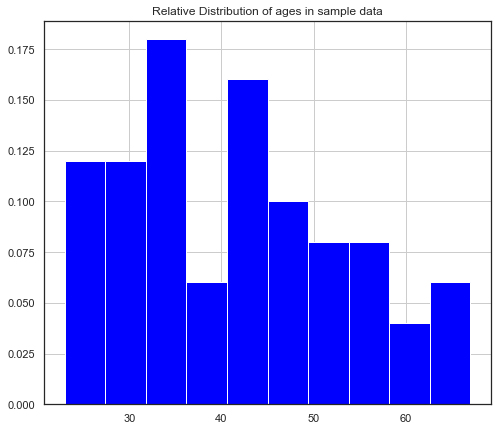

In [23]:
fig = plt.figure(figsize=(8, 24))
g = fig.add_subplot(311)
g.title.set_text("Relative Distribution of ages in sample data")
g.grid(True)
weights = np.ones_like(npData[:, 2]) / len(npData[:, 2])
g.hist(npData[:, 2], color="blue", weights=weights)